# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


Important! After you have ran pip install, please restart the kernel using the **Kernel** menu 

In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended. 

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [3]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 5.68s ========================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ``` 
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
> 
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> **Answer**: 



### Procedure for Preprocessing the Data

#### Image Resizing:

The input images are resized to a fixed size of **224x224 pixels**. First, the images are resized to **256x256**, then randomly cropped to **224x224**. This is a common practice to standardize the input size for CNN architectures like AlexNet, VGG, or ResNet while preserving the content of the image. The **padding** mode is set to "reflect" if padding is necessary, ensuring that no distortion (stretching or squeezing) is introduced, which could affect feature learning.

#### Data Augmentation:

Yes, I applied several data augmentation techniques to artificially increase the size of the training dataset and improve the generalization ability of the model. Data augmentation helps prevent overfitting and introduces variations that the model may encounter in real-world scenarios. Here’s a breakdown of the augmentations applied:

- **Random Affine Transformations**: This augmentation randomly scales, translates, and rotates the image. Specifically:
  - **Scale**: The image is randomly scaled between **90% to 110%** of its original size.
  - **Translation**: The image is randomly shifted by up to **10%** in both horizontal and vertical directions.
  - **Rotation**: The image is rotated by up to **10 degrees**. These affine transformations simulate various real-world distortions, ensuring that the model is robust to slight variations in positioning and orientation.

- **Color Jitter**: This transformation adjusts the **brightness**, **contrast**, **saturation**, and **hue** of the image by **50%**. It allows the model to learn to focus on structural elements of landmarks rather than relying on color patterns, which might change due to lighting conditions.

- **Random Horizontal Flip**: This transformation horizontally flips the image with a **50% probability**, helping the model learn orientation invariance.

- **Random Crop**: A **random 224x224 crop** is taken from the resized image. This simulates different framings of the same landmark, ensuring that the model can focus on different parts of the image and still classify it correctly.

- **RandAugment**: This advanced augmentation method applies two random augmentations with a magnitude of **9**. It introduces more variability by applying augmentations such as brightness or contrast changes, translations, or rotations randomly, ensuring the model generalizes well to a variety of distortions.

#### Normalization:

After these augmentations, the images are normalized using the **mean** and **standard deviation** computed from the training data. Normalization scales the pixel values to a range centered around zero, which helps stabilize the training process and ensures that the model converges faster. 

#### Tensor Conversion:

Once the images are augmented and normalized, they are converted to tensors (PyTorch’s data structure) to be fed into the CNN. This conversion is necessary as tensors are the format expected by PyTorch models during training and inference.

### Reasoning Behind Preprocessing Choices:

#### Image Size:

The choice of **224x224** is a balance between computational efficiency and the need to retain enough detail for classification. Larger image sizes could provide more detail but would also increase computational cost, while smaller images might miss out on critical features necessary for landmark recognition.

#### Data Augmentation:

I applied a comprehensive set of data augmentations to increase the variability of the dataset and prevent overfitting. The combination of **affine transformations**, **color jitter**, and **RandAugment** ensures that the model can generalize better to variations in scale, lighting, and orientation. This approach simulates real-world conditions where landmarks might be photographed from various angles, under different lighting, or with slight distortions. 

#### No Distortion:

The resizing and cropping approach ensures that the images maintain their original aspect ratio, preventing any unwanted stretching or squeezing. By preserving the aspect ratio, I ensured that the structural features of landmarks remain intact, which is crucial for classification accuracy.


### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [4]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 5.62s ========================


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


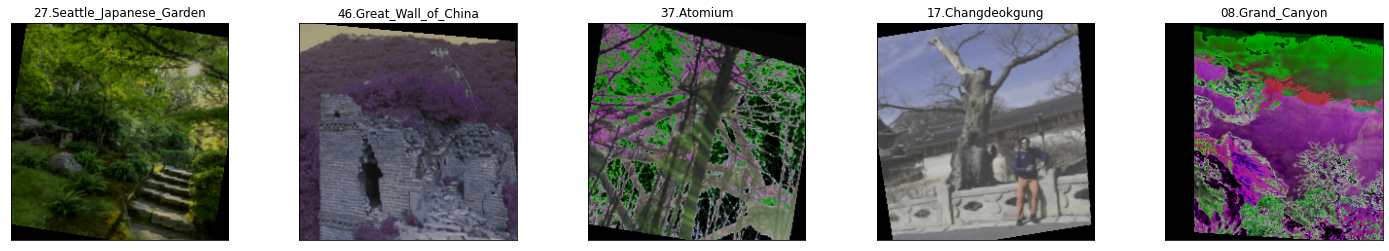

In [5]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

import multiprocessing

# Get the number of available CPUs
num_workers = multiprocessing.cpu_count()

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size=5, valid_size=0.01, num_workers=num_workers)

visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [6]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 34.69s ==============================


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> __Answer:__ 


### Steps to Designing the Final CNN Architecture: Understanding the Problem

The task is landmark classification, where the CNN needs to extract relevant features from images of landmarks and classify them into one of several classes. This is a typical image classification problem, and the goal is to design a CNN architecture capable of capturing essential visual features effectively.

### Input Consideration:

The input consists of RGB images (3 channels). Therefore, the first convolutional layer expects 3 input channels. The images are resized to a standard dimension of **224x224**, which is commonly used in CNN architectures like AlexNet, VGG, or ResNet. This input size provides a balance between computational efficiency and preserving enough detail in the images for classification.

### Designing the Convolutional Layers:

#### Layer 1:
- **Input**: RGB images with shape (3 channels, 224x224).
- **Conv1**: I used a convolutional layer with **32 filters** of size **3x3**. A small kernel size captures fine details while keeping the computational cost manageable. Padding of 1 ensures that the spatial dimensions remain unchanged.
- **ReLU Activation**: Introduced non-linearity using ReLU.
- **MaxPooling**: Applied with a kernel size of **2x2** and stride of 2, halving the spatial dimension and reducing the computational complexity, making the network more efficient.

#### Layer 2:
- **Conv2**: This layer has **64 filters** with the same kernel size (3x3). Increasing the number of filters allows the model to learn more complex features from the images. The same padding is applied to preserve spatial dimensions before pooling.
- **ReLU Activation** and **MaxPooling**: Pooling reduces the image size further.

#### Layer 3:
- **Conv3**: I used **128 filters** in this layer to capture even higher-level features. As the depth of the network increases, more filters are typically used to capture a greater variety of features.
- **ReLU Activation** and **MaxPooling**: As before, pooling reduces the size further.

#### Layer 4:
- **Conv4**: This layer uses **256 filters**, following the pattern of increasing the number of filters to capture increasingly complex patterns in the images.
- **ReLU Activation** and **MaxPooling**: The pooling reduces the image size further, improving efficiency.

#### Layer 5:
- **Conv5**: Finally, I added a layer with **512 filters** to extract the most abstract features before transitioning to the fully connected layers.
- **ReLU Activation** and **MaxPooling**: Pooling reduces the spatial dimensions again, preparing the output for flattening.

### Flattening the Output:

After the convolutional and pooling layers, the output is a 4D tensor (batch size, number of filters, height, width). To feed this into fully connected layers, the tensor must be flattened into a 2D tensor (batch size, flattened dimension). After the fifth pooling layer, the spatial dimensions of the output tensor are reduced, and the resulting tensor is flattened for the fully connected layers.

### Designing the Fully Connected Layers:

#### FC1:
- The fully connected layer (fc1) takes the flattened tensor and reduces it to **512 neurons**. This layer learns high-level abstractions from the features extracted by the convolutional layers.

#### Dropout Layer:
- Added **dropout** to prevent overfitting by randomly setting some neurons to zero during training. The dropout rate is passed as a parameter to the model.

#### FC2:
- The second fully connected layer further reduces the feature set to **256 neurons**.

#### FC3 (Final Layer):
- The final classification layer has **num_classes** output neurons (one for each class). The output corresponds to the predicted scores for each class.

### Activation Functions:

- **ReLU**: I used the ReLU (Rectified Linear Unit) activation function after each convolutional and fully connected layer (except the final layer). ReLU is popular for its simplicity and effectiveness in mitigating the vanishing gradient problem, allowing better learning in deep networks.
- **Softmax**: While softmax isn't explicitly applied in the architecture itself, it can be used during training to convert logits into probabilities when using cross-entropy loss.

### Data Augmentation:

To improve generalization and avoid overfitting, I applied data augmentation. This artificially increases the size of the dataset by introducing variations in the training images. The following augmentations were applied:

- **Random Horizontal Flips**: This augmentation helps the model learn invariance to the orientation of objects, which is particularly useful for landmarks, where the appearance remains the same regardless of whether the object appears on the left or right side.
- **Random Rotations**: Introduced rotation invariance, allowing the model to learn to classify landmarks even when the images are rotated by up to 30 degrees.
- **Random Color Jitter**: Adjusted brightness, contrast, saturation, and hue to introduce variation in color conditions, helping the model learn generalizable features rather than focusing on specific color patterns.

### Reasoning Behind Design Choices:

#### Choice of Convolutional Layers:
I chose five convolutional layers to allow for progressively deeper feature extraction. As we go deeper into the network, the number of filters increases to help the network learn more abstract features (e.g., from edges and textures to objects and complex shapes). The **3x3** kernel size is a standard choice for capturing local features while keeping computational costs reasonable.

#### Pooling Layers:
Pooling helps reduce the spatial dimensions of the image after each convolutional layer, making the model more efficient and reducing the risk of overfitting. The **2x2 pooling** size is standard and effectively halves the input dimensions without losing too much information.

#### Fully Connected Layers:
The fully connected layers aggregate the extracted features to make the final classification decision. I used **512 neurons** in the first fully connected layer as a reasonable size for learning high-level representations before the final classification. The additional fully connected layers help the model learn more complex patterns.

#### Dropout:
Dropout was added with a configurable rate to prevent overfitting, especially since the fully connected layers have many parameters. Dropout helps regularize the model and improve generalization.

#### ReLU Activation:
ReLU is widely used due to its simplicity and ability to avoid vanishing gradients. It introduces non-linearity, allowing the network to learn more complex patterns.

### Parameter Choices:

I ensured that the architecture is flexible by passing **num_classes** and **dropout** as arguments to the model’s constructor. This allows easy customization for different datasets and classification tasks.


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [7]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.88s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [8]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.78s ========================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [9]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

================== 1 passed, 3 deselected in 92.00s (0:01:31) ==================


Now complete the `valid` function, then run the tests:

In [10]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

================= 1 passed, 3 deselected in 118.10s (0:01:58) ==================


Now complete the `optimize` function, then run the tests:

In [11]:
!pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

================= 1 passed, 3 deselected in 190.90s (0:03:10) ==================


Finally, complete the `test` function then run the tests:

In [12]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

================= 1 passed, 3 deselected in 118.32s (0:01:58) ==================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [13]:
batch_size = 32        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 100        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.4          # dropout for our model
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0     # regularization. Increase this to combat overfitting
momentum = 0.5

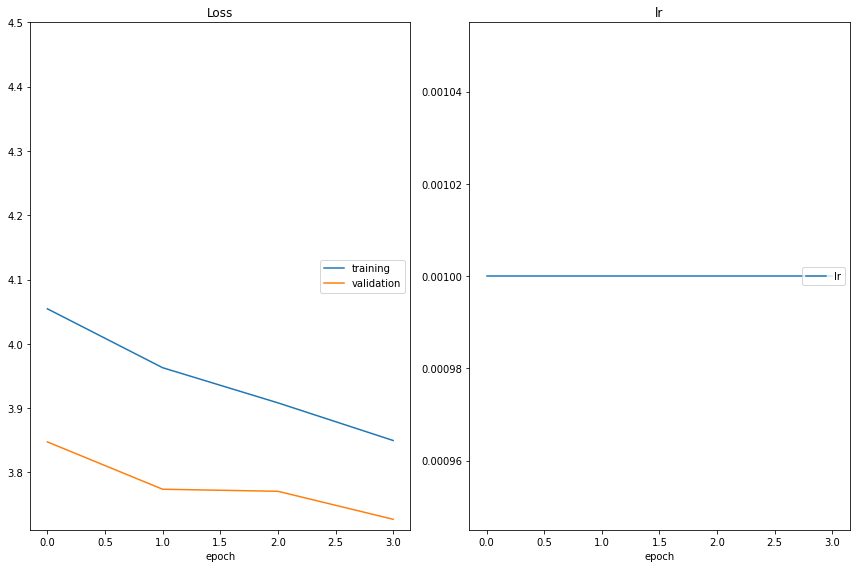

Training:   0%|                                         | 0/125 [00:00<?, ?it/s]

In [ ]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes=num_classes, dropout=dropout)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, opt, learning_rate, weight_decay, momentum)

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=True
)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [ ]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

checkpoint = torch.load("checkpoints/best_val_loss.pt")
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Run test
one_epoch_test(data_loaders['test'], model, loss)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [ ]:
!pytest -vv src/predictor.py

Allright, now we are ready to export our model using our Predictor class:

In [ ]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

# Load the best weights found during training
# Ensure to load the model on the CPU by specifying map_location='cpu'
checkpoint = torch.load("checkpoints/best_val_loss.pt", map_location='cpu')
model.load_state_dict(checkpoint)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported.pt")

Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [ ]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("checkpoints/original_exported.pt")

In [ ]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

Finally, let's have a look at the confusion matrix of the model we are going to use in production:

In [ ]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)